In [165]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:


# Visualisation of Qvar output reading
# Insert the .txt datafile path into read_csv('~') path argument

# NB: Finger mapping may vary.


data = pd.read_csv('/content/drive/Shareddrives/MEng Capstone QVar Project/Data Collection/Trials 8 17/andy data/user_app_class_107_andy_D_400Hz.txt', sep='\t')

times_microseconds = data['Timestamp [us]'].tolist()
ax_values = data['A_X [LSB]'].tolist()
qvar_values = data['QVAR [LSB]'].tolist()
channelmarker = data['AFE_CHANNEL [#]'].tolist()

##########
# Cut all data before synchronization event
def Synchronize(times,ax_values,qvar_values):
  index = 0
  tol = 10000
  mean = np.mean(ax_values)
  dev = np.std(ax_values)
  thold = 3 # can possibly change based off of need
  for i in ax_values:
    index = index + 1
    z_scr = (i - mean)/dev
    if abs(z_scr) > thold: #if i > tol or i < tol:
      ntimes = times[0:len(times)-index]
      nqvar_values = qvar_values[index:len(qvar_values)]
      break

  return ntimes,nqvar_values
##########

channels = max(channelmarker) + 1
# times_uncut = []
# index = p
# while index < len(qvar_values):
#   times_uncut.append(times_microseconds[index])
#   index = index + 1

times_cut,qvar_values = Synchronize(times_microseconds,ax_values,qvar_values)
# times_cut = times_microseconds

index = 0
times = []
# ax = []
# channels = max(channelmarker) + 1
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
while index + channels < len(qvar_values):
  times.append(times_cut[index+1])
  # ax.append(ax_values[index+1])
  if channels > 0:
    P1.append(qvar_values[index])
  if channels > 1:
    P2.append(qvar_values[index+1])
  if channels > 2:
    P3.append(qvar_values[index+2])
  if channels > 3:
    P4.append(qvar_values[index+3])
  if channels > 4:
    P5.append(qvar_values[index+4])
  if channels > 5:
    P6.append(qvar_values[index+5])
  index = index + channels

##########
def FingerDifferential(P1,P2,finger1):
  # finger1 = []
  index = 0
  while index < len(P1):
    finger1.append(P1[index] - P2[index])
    index = index + 1

  return finger1
##########

if channels > 3:
  finger1 = []
  finger1 = FingerDifferential(P5,P6,finger1)
  if channels > 2:
    finger2 = []
    finger2 = FingerDifferential(P1,P2,finger2)
  if channels > 4:
    finger3 = []
    finger3 = FingerDifferential(P3,P4,finger3)
else:
  finger1 = P1
  finger2 = P2
  finger3 = P3

data
# finger1


,Timestamp [us],A_X [LSB],A_Y [LSB],A_Z [LSB],A_X [mg],A_Y [mg],A_Z [mg],AFE_CHANNEL [#],QVAR [LSB],Unnamed: 9
0,1465,8416,-2720,15008,513.376,-165.920,915.488,1,-1984,NaN
1,3955,8352,-2656,15056,509.472,-162.016,918.416,2,-2144,NaN
2,6448,8272,-2672,14992,504.592,-162.992,914.512,3,-2320,NaN
3,8942,8320,-2736,15040,507.520,-166.896,917.440,4,-2672,NaN
4,11436,8176,-2848,15072,498.736,-173.728,919.392,5,-3040,NaN
...,...,...,...,...,...,...,...,...,...,...
27526,68651349,12272,-4144,10544,748.592,-252.784,643.184,5,-7296,NaN
27527,68653843,12288,-4160,10576,749.568,-253.760,645.136,0,-7216,NaN
27528,68656338,12224,-4160,10624,745.664,-253.760,648.064,1,-7408,NaN
27529,68658831,12176,-4192,10608,742.736,-255.712,647.088,2,-7344,NaN


In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Function Code


In [168]:
# Center Qvar data on y-axis
def CenterData(qvar_values):
  avg_qvar = sum(qvar_values[0:100])/len(qvar_values[0:100])
  index = 0
  for i in qvar_values:
    index = index + 1
    qvar_values[index-1] = i - avg_qvar

  return qvar_values

# Normalize qvar data

def NormalizeData(qvar_values):
  index = 0
  for i in qvar_values:
    index = index + 1
    qvar_values[index-1] = (i - min(qvar_values)) / (max(qvar_values) - min(qvar_values))

  return qvar_values

# Plot data
def PlotData(times,values,title,colorr):
  plt.plot(times, values, color = colorr, linestyle = 'None',
          marker = '*', markersize = 1, label = "Finger 1")
  plt.xlabel('Time / us')
  plt.ylabel('QVar Values [LSB]')
  plt.title(title, fontsize = 10)
  plt.grid()
  # plt.show()

# Plot Interval Lines
def PlotIntervals():
  # LAB
  plt.axvline(x = 0.3e7, color = 'k', alpha=0.4)
  plt.axvline(x = 0.6e7, color = 'k', alpha=0.4)
  plt.axvline(x = 0.9e7, color = 'k', alpha=0.4)
  plt.axvline(x = 1.2e7, color = 'k', alpha=0.4)
  plt.axvline(x = 1.5e7, color = 'k', alpha=0.4)
  plt.axvline(x = 1.8e7, color = 'k', alpha=0.4)
  plt.axvline(x = 2.1e7, color = 'k', alpha=0.4)

  # # LACABA
  # plt.axvline(x = 0.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 0.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 0.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 1.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.3e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.6e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 2.9e7, color = 'k', alpha=0.4)
  # plt.axvline(x = 3.3e7, color = 'k', alpha=0.4)

#QVar data

In [169]:
times_seconds = [i*10**(-6) for i in times_microseconds] # Original data was in microseconds, might be useful to redefine in seconds

################
# Implement Functions
# finger1 = NormalizeData(finger1)
# finger2 = NormalizeData(finger2)
# finger3 = NormalizeData(finger3)

finger1 = CenterData(finger1)
#finger2 = CenterData(finger2)
#finger3 = CenterData(finger3)

# To invert values, not necessary, only use if you need it
finger1 = [x * -1 for x in finger1]

################

Let's individually plot each dataset from each finger individually. The issue of data synchronisation and data fusion has to be considered if we want to plot all three channels concurrently on the same plot (given that each channel starts data recording at different times).

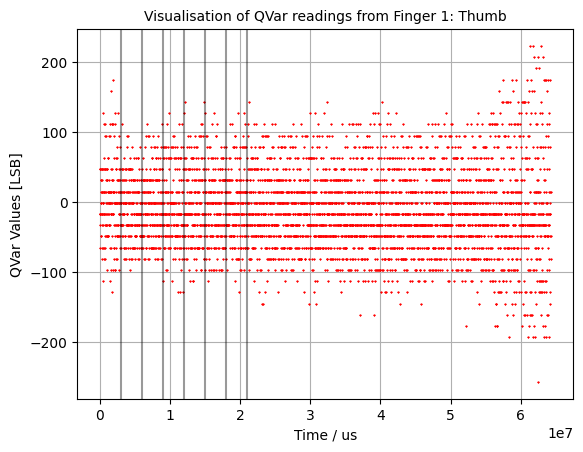

In [170]:
# Plot Qvar
PlotData(times,finger1,"Visualisation of QVar readings from Finger 1: Thumb",'r')
PlotIntervals()
#plt.ylim(-0.5,0.5)
#plt.xlim(-1000,1000)

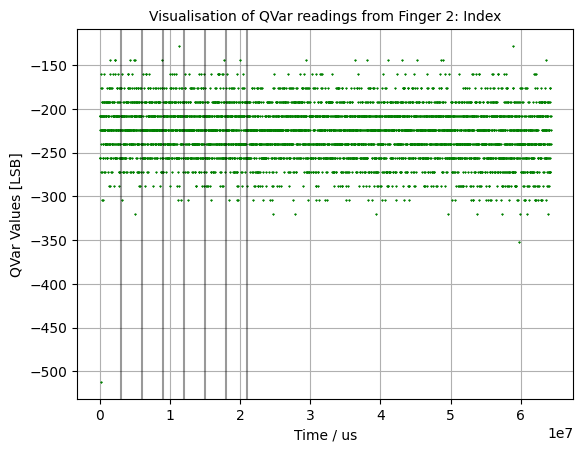

In [171]:
# Plot data 2
PlotData(times,finger2,"Visualisation of QVar readings from Finger 2: Index",'g')
PlotIntervals()
#plt.ylim(-500,500)

(-1000.0, 1000.0)

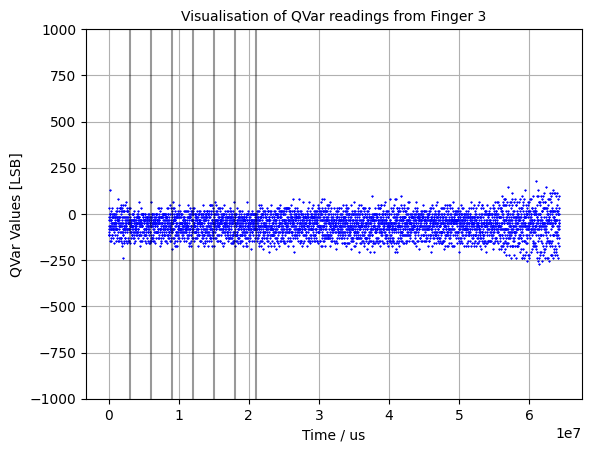

In [172]:
# Plot data 3
PlotData(times,finger3,"Visualisation of QVar readings from Finger 3",'b')
PlotIntervals()
plt.ylim(-1000,1000)

(-1000.0, 1000.0)

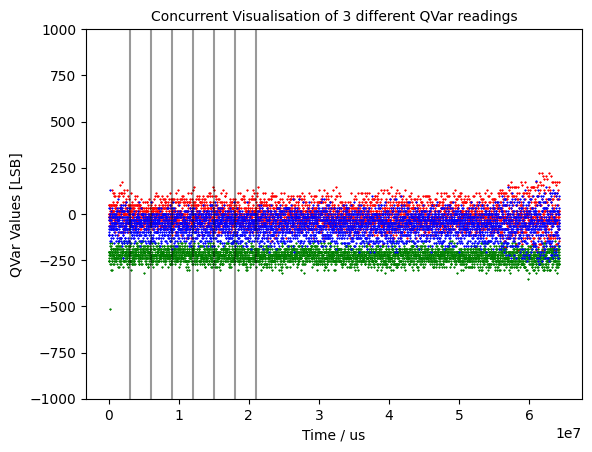

In [176]:
PlotData(times,finger1,"",'r')
PlotData(times,finger2,"",'g')
PlotData(times,finger3,"Concurrent Visualisation of 3 different QVar readings",'b')

PlotIntervals()

plt.grid()

plt.ylim(-1000,1000)

#QVar data

In [174]:
# cut data down to a minute exactly
start, end = time_index_finder(times, 0, 6e7)
new_time = times[start:end]
new_fin1 = finger1[start:end]
new_fin2 = finger2[start:end]
new_fin3 = finger3[start:end]

#test new fun
PlotData(new_time,new_fin1,"",'r')
PlotData(new_time,new_fin2,"",'g')
PlotData(new_time,new_fin3,"Concurrent Visualisation of 3 different QVar readings",'b')

PlotIntervals()

plt.grid()

NameError: ignored

In [ ]:
def trim_interval_data(start_cut_num, end_cut_num, time_grid, data1, data2, data3): #cuts certain amount of intervals specified at start and end
  begin = start_cut_num*3e6
  end = len(time_grid)-(end_cut_num*3e6)
  trim_time = time_grid[begin:end]
  trim_dat1 = data1[begin:end]
  trim_dat2 = data2[begin:end]
  trim_dat3 = data3[begin:end]
  return trim_time, trim_dat1, trim_dat2, trim_dat3


In [ ]:
def time_index_finder(time_grid, start_value, end_value):
  start_index=0
  end_index = 0
  index = 0
  for i in time_grid:
    if i >= start_value:
      start_index = index
      break
    index+=1

  index = 0
  for i in time_grid:
    if i >= end_value:
      end_index = index
      break
    index+=1
  return start_index, end_index

In [ ]:
time1 = 9
time2 = 12

index1,index2 = time_index_finder(times, time1*10**6, time2*10**6)

finger1_fft = np.fft.fft(finger2[index1:index2])

samplingtime = 1/(800/6)
N = len(finger1_fft)
frequencygrid = [i for i in range(0,N)]
for i in frequencygrid:
  i = i/(N*samplingtime)

PlotData(frequencygrid,finger1_fft,"",'r')
# plt.ylim(-20,20)
# plt.xlim(0,200)

**Comments on Preliminary Visualisation of Data:**

Default ambient value for the QVar sensor ('No Touch') is 0. The "Long Touch" sequences are most obvious, hitting a floor value of -32768 for the QVar readings. The individual quick touches "Touch 1", "Touch 2", "Touch 3" spikes are also discernible in the pattern, but need better visualisation to differentiate the pattern.

**N.B** We need a way of visualising a large amount of datapoints better, as there are too many datapoints and may swamp out individual spikes/patterns in the signal readings. Play around more with plotting parameters, functions.

https://www.online-stopwatch.com/full-screen-interval-timer/?c=8z6pmhnvd

https://www.online-stopwatch.com/full-screen-interval-timer/?c=bmixgtpvc

https://www.online-stopwatch.com/full-screen-interval-timer/?c=1z18triarq
